In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.io import loadmat

In [3]:
data=loadmat('ex3data1.mat')

In [4]:
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
data['X'].shape,data['y'].shape

((5000, 400), (5000, 1))

In [7]:
rand_indices=np.random.permutation(data['X'].shape[0])
rand_indices

array([4607, 2431, 2981, ..., 1403, 2121,  359])

In [8]:
X=data['X']
Y=data['y']

In [9]:
sel=X[rand_indices[0:100],:]
sel.shape

(100, 400)

In [10]:
def displayData(x):
    #getting size of data 'x'
    [m,n]=[x.shape[0],x.shape[1]]
    
    #calculating height and width of each digit
    example_width=int(round(np.sqrt(n)))
    example_height=int(np.ceil(n/example_width))
    
    #caluclting how many rows and columns to display
    disp_rows=np.floor(np.sqrt(m))
    disp_col=np.ceil(m/disp_rows)
    
    disp_array=np.zeros((int(disp_rows*example_height),int(disp_col*example_width)))
    
    curr_ex=0
    for j in range(int(disp_rows)):
        for i in range(int(disp_col)):
            if(curr_ex>m):
                break
            max_val=np.max(np.abs(x[curr_ex,:]))
            disp_array[j*example_height:(j+1)*example_height,i*example_width:((i+1)*example_width)]=np.reshape(x[curr_ex,:],(20,20))/max_val
            curr_ex=curr_ex+1
        if(curr_ex>m):
            break
    plt.figure(figsize=(7,7))
    plt.imshow(disp_array.T)

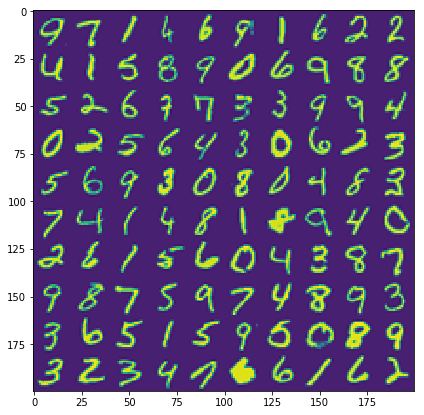

In [11]:
displayData(sel)

In [12]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [13]:
def costFunction(theta,x,y,lambda_par):
    theta=np.matrix(theta)
    x=np.matrix(x)
    y=np.matrix(y)
    h=sigmoid(x*theta.T)
    J = -1*y.T*np.log(h)-(1 - y).T*np.log(1-h)
    reg = (lambda_par / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(J) / (len(X)) + reg

In [14]:
def Gradient(theta,x,y,lambda_par):
    m=len(y)
    x=np.matrix(x)
    y=np.matrix(y)
    theta=np.matrix(theta)
    h=sigmoid(x*theta.T)
    err=h-y
    grad=((1/m)*x.T*err+(lambda_par/m)*theta.T)
    
    grad[0] = grad[0]-(lambda_par/m)*theta.T[0]
    return grad.ravel()

In [15]:
from scipy.optimize import minimize
def onevsall(x,y,num_labels,lambda_par):
    [m,n]=[x.shape[0],x.shape[1]]
    all_theta=np.zeros((num_labels,n+1))
    x=np.column_stack((np.zeros((m,1)),x))
    
    for i in range(num_labels):
        ini_theta=np.zeros((n+1,1))
        fmin=minimize(fun=costFunction,x0=ini_theta,args=(x,(y==i+1),lambda_par),method='TNC',jac=Gradient)
        theta=fmin.x
        all_theta[i,:]=theta

    return all_theta

In [16]:
def predict_one_vs_all(all_theta,X,Y):
    num_labels=all_theta[0]
    m=len(Y)
    x=x=np.column_stack((np.zeros((m,1)),X))
    h=np.zeros((m,1))
    h=sigmoid(np.dot(x,all_theta.T))
    pred=np.argmax(h,axis=1)
    pred=pred+1
    return pred

In [17]:
all_theta=onevsall(X,Y,10,1)

In [18]:
y_pred=predict_one_vs_all(all_theta,data['X'],data['y'])

In [19]:
correct=[1 if (y_pred[i]==Y[i]) else 0 for i in range(len(y_pred))]

In [20]:
accuracy=sum(correct)/len(y_pred)

In [21]:
print('accuracy={a}'.format(a=accuracy*100))

accuracy=94.12
